In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Mini_Project_1(Skin Cancer Classification)/Skin_Cancer_dataset.zip'

Archive:  /content/drive/MyDrive/Mini_Project_1(Skin Cancer Classification)/Skin_Cancer_dataset.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/a

In [ ]:
!pip install Augmentor

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import callbacks
from keras import layers
from keras import callbacks
import os
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import seaborn as sns

In [ ]:
classes = os.listdir('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')
classes

['squamous cell carcinoma',
 'pigmented benign keratosis',
 'dermatofibroma',
 'vascular lesion',
 'actinic keratosis',
 'seborrheic keratosis',
 'melanoma',
 'nevus',
 'basal cell carcinoma']

In [ ]:
data_dir_train = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

total training image count = 2239 

-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056275123
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  vascular lesion
count      =  139
proportion =  0.062081286288521664
-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.159446181330951

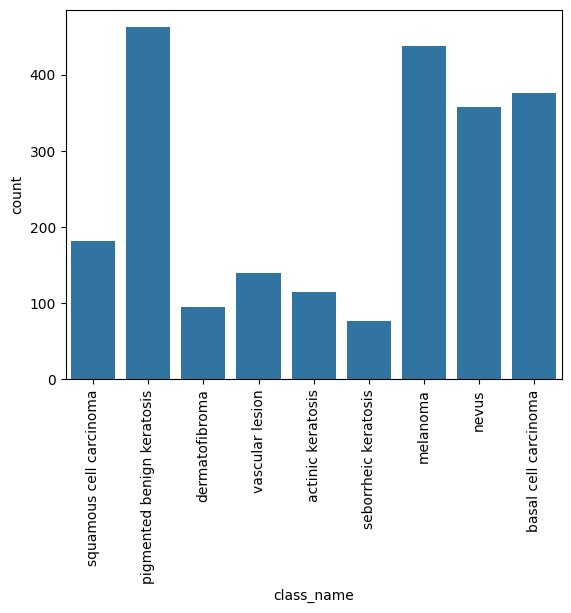

In [ ]:
num_classes = len(classes)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(classes[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(classes[i]+'/*.jpg')))
  print("Class name = ",classes[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(classes[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

#Data Augmentation

In [ ]:
import Augmentor
path_to_training_dataset = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
for i in classes:
    print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory='/content/dataset/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /content/dataset/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E8E2F726890>: 100%|██████████| 1000/1000 [00:42<00:00, 23.69 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /content/dataset/pigmented benign keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E8E2F78F040>: 100%|██████████| 1000/1000 [00:29<00:00, 34.07 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/dataset/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E8E3F1B7D90>: 100%|██████████| 1000/1000 [00:30<00:00, 32.69 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to /content/dataset/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E8E412EC1F0>: 100%|██████████| 1000/1000 [00:30<00:00, 32.80 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/dataset/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E8E3F1B48B0>: 100%|██████████| 1000/1000 [00:29<00:00, 33.37 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/dataset/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E8E3C14D0F0>: 100%|██████████| 1000/1000 [01:12<00:00, 13.71 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to /content/dataset/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E8E416D2110>: 100%|██████████| 1000/1000 [02:35<00:00,  6.43 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
Initialised with 357 image(s) found.
Output directory set to /content/dataset/nevus.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7E8E3F1B4880>: 100%|██████████| 1000/1000 [02:34<00:00,  6.47 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to /content/dataset/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E8ED0B26440>: 100%|██████████| 1000/1000 [00:29<00:00, 34.08 Samples/s]


total training image count = 9000 

-------------------------------------
Class name =  squamous cell carcinoma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  vascular lesion
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  actinic keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  seborrheic keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  1000
proportion =  0.1111111111111

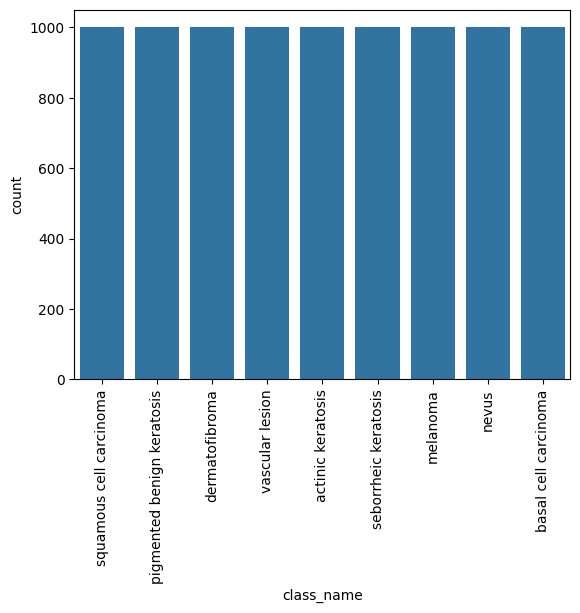

In [ ]:
data_dir_train = pathlib.Path('/content/dataset')

classes = os.listdir(data_dir_train)
num_classes = len(classes)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(classes[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(classes[i]+'/*.jpg')))
  print("Class name = ",classes[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(classes[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_data = keras.utils.image_dataset_from_directory(data_dir_train,
                                                      seed = 123,
                                                      validation_split = 0.2,
                                                      subset = 'training',
                                                      image_size = (256,256),
                                                      batch_size = 32)

val_data = keras.utils.image_dataset_from_directory(data_dir_train,
                                                    seed = 123,
                                                    validation_split = 0.2,
                                                    subset = 'validation',
                                                    image_size = (256,256),
                                                    batch_size = 32)

test_data = keras.utils.image_dataset_from_directory(data_dir_test,
                                                    image_size = (256,256),
                                                    batch_size = 32)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.
Found 9000 files belonging to 9 classes.
Using 1800 files for validation.
Found 118 files belonging to 9 classes.


In [ ]:
model = keras.Sequential([
    keras.Input(shape=(256,256,3)),

    layers.Conv2D(32, (3,3), padding = 'valid'),
    layers.Activation('elu'),
    layers.Conv2D(32, (3,3), padding = 'valid'),
    layers.Activation('elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3)),
    layers.Activation('elu'),
    layers.Conv2D(64, (3,3)),
    layers.Activation('elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3)),
    layers.Activation('elu'),
    layers.Conv2D(128, (3,3)),
    layers.Activation('elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3,3)),
    layers.Activation('elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(256),
    layers.Activation('relu'),
    layers.Dropout(0.25),

    layers.Dense(128),
    layers.Activation('relu'),

    layers.Dense(9, activation = 'softmax')
])

In [ ]:
checkpoint = callbacks.ModelCheckpoint('Skin_Cancer_Model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

# earlystop = callbacks.EarlyStopping(monitor='val_loss',
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

model_callbacks = [checkpoint, reduce_lr]

In [ ]:
model.summary()
# from keras.utils import plot_model
# plot_model(model, show_shapes = True, show_layer_activations = True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 254, 254, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 activation_11 (Activation)  (None, 252, 252, 32)      0         
                                                                 
 batch_normalization_4 (Bat  (None, 252, 252, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                 

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy'])

In [ ]:
training = model.fit(train_data, epochs = 25, validation_data = val_data, callbacks =  model_callbacks)

Epoch 1/25
225/225 [==============================] - ETA: 0s - loss: 4.3822 - accuracy: 0.2907
Epoch 1: val_loss improved from inf to 4.83057, saving model to Skin_Cancer_Model.h5
225/225 [==============================] - 59s 238ms/step - loss: 4.3822 - accuracy: 0.2907 - val_loss: 4.8306 - val_accuracy: 0.1589 - lr: 0.0010
Epoch 2/25
225/225 [==============================] - ETA: 0s - loss: 2.0476 - accuracy: 0.3631
Epoch 2: val_loss improved from 4.83057 to 3.07588, saving model to Skin_Cancer_Model.h5
225/225 [==============================] - 58s 252ms/step - loss: 2.0476 - accuracy: 0.3631 - val_loss: 3.0759 - val_accuracy: 0.2494 - lr: 0.0010
Epoch 3/25
225/225 [==============================] - ETA: 0s - loss: 1.6768 - accuracy: 0.4582
Epoch 3: val_loss improved from 3.07588 to 2.73048, saving model to Skin_Cancer_Model.h5
225/225 [==============================] - 54s 237ms/step - loss: 1.6768 - accuracy: 0.4582 - val_loss: 2.7305 - val_accuracy: 0.2339 - lr: 0.0010
Epoch 4/

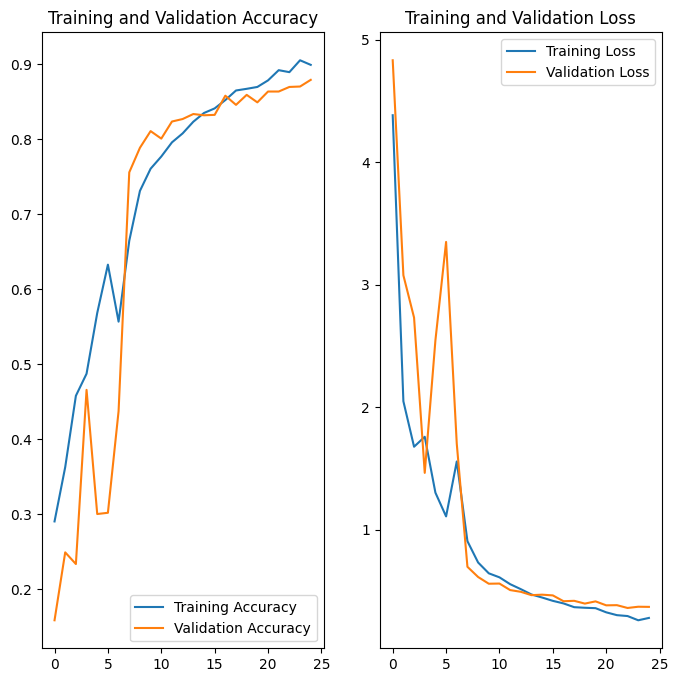

In [ ]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(train_data, batch_size=1, verbose=1)

225/225 [==============================] - 24s 103ms/step - loss: 0.1338 - accuracy: 0.9515


In [ ]:
model.save('model-90A-87VA.h5')

NameError: name 'model' is not defined

In [ ]:
eval_accuracy

0.9515277743339539